Check What we access is GPU or CPU

In [ ]:
!nvidia-smi

Thu Sep 26 01:57:37 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   54C    P8              10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
import torch
!nvcc --version
TORCH_VERSION = ".".join(torch.__version__.split(".")[:2])
CUDA_VERSION = torch.__version__.split("+")[-1]
print("torch: ",TORCH_VERSION, "; cuda: ", CUDA_VERSION )


nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2023 NVIDIA Corporation
Built on Tue_Aug_15_22:02:13_PDT_2023
Cuda compilation tools, release 12.2, V12.2.140
Build cuda_12.2.r12.2/compiler.33191640_0
torch:  2.4 ; cuda:  cu121


In [ ]:
import os
HOME = os.getcwd()
print(HOME)

/content


In [ ]:
!pip install ultralytics

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.2.101 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 36.5/112.6 GB disk)


In [ ]:
!pip install supervision

from IPython import display
display.clear_output()

import supervision as sv
print("supervision", sv.__version__)

supervision 0.23.0


In [ ]:
!pip install supervision[assets] -q

from IPython import display
display.clear_output()

Import Model yolo

In [ ]:
from ultralytics import YOLO

model = YOLO('yolov8s.pt')

100%|██████████| 21.5M/21.5M [00:00<00:00, 197MB/s]



WARNING ⚠️ NMS time limit 2.050s exceeded
0: 736x1280 32 persons, 2 bicycles, 30 cars, 3 motorcycles, 147.3ms
Speed: 32.7ms preprocess, 147.3ms inference, 2317.1ms postprocess per image at shape (1, 3, 736, 1280)


SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.


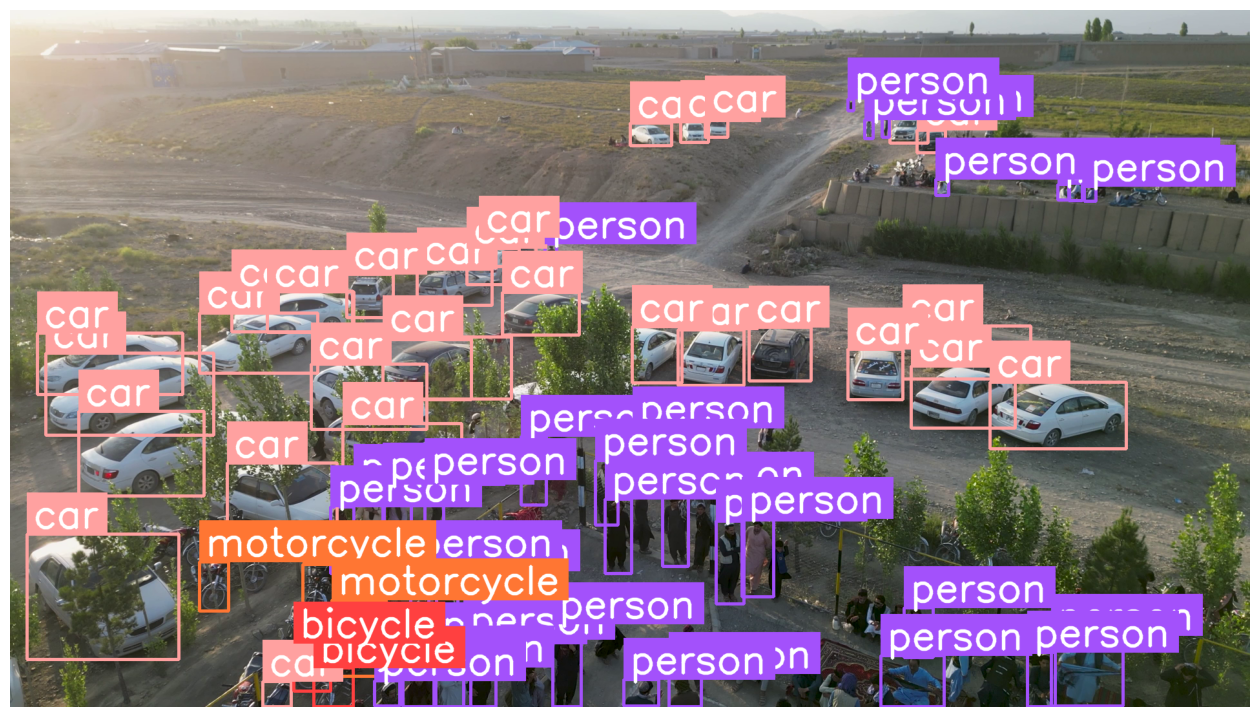

In [ ]:
generator = sv.get_video_frames_generator('/content/6356427_Football Stadium_Prayer_1920x1080.mp4')
iterator = iter(generator)
frame = next(iterator)

results = model(frame, imgsz = 1280)[0]
detections = sv.Detections.from_ultralytics(results)

#anotate
box_annotator = sv.BoundingBoxAnnotator(thickness=4)
label_annotator = sv.LabelAnnotator(text_thickness = 4, text_scale = 2)
frame = box_annotator.annotate(scene = frame, detections = detections)
frame = label_annotator.annotate(scene = frame, detections = detections)

%matplotlib inline
sv.plot_image(frame,(16,16))


0: 736x1280 32 persons, 2 bicycles, 30 cars, 3 motorcycles, 30.1ms
Speed: 8.0ms preprocess, 30.1ms inference, 2.2ms postprocess per image at shape (1, 3, 736, 1280)


SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.


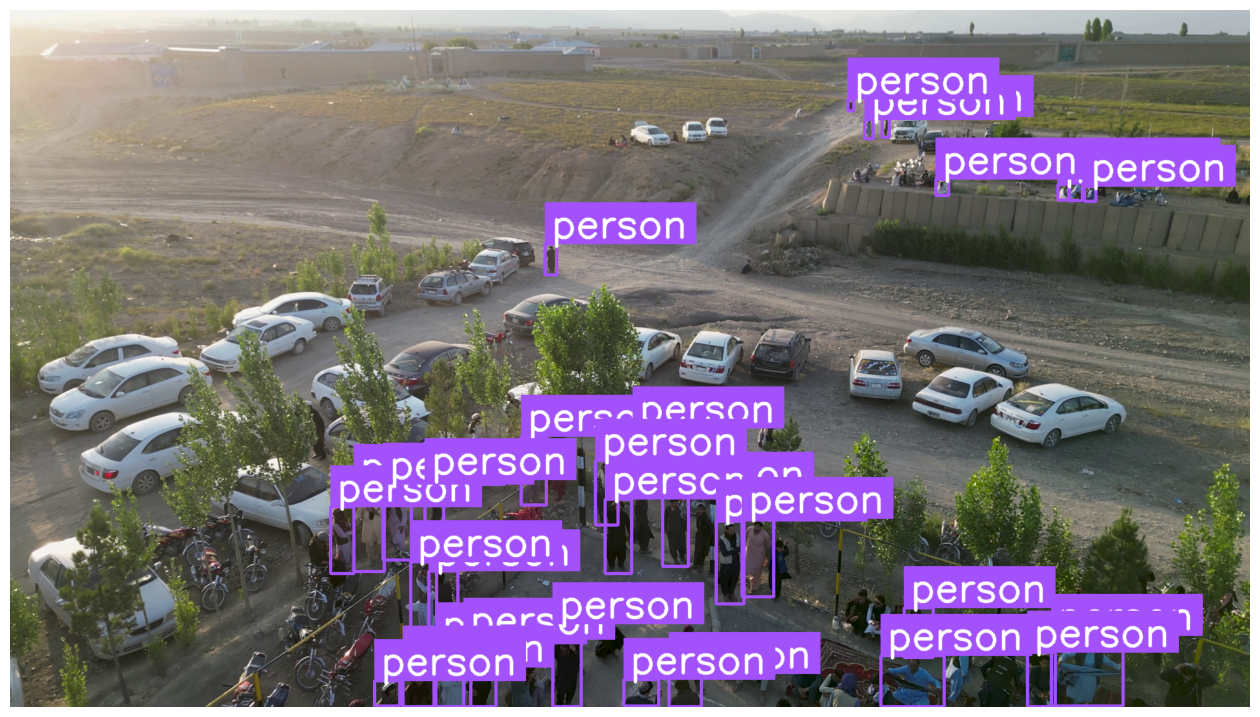

In [ ]:
generator = sv.get_video_frames_generator('/content/6356427_Football Stadium_Prayer_1920x1080.mp4')
iterator = iter(generator)
frame = next(iterator)

results = model(frame, imgsz = 1280)[0]
detections = sv.Detections.from_ultralytics(results)
detections = detections[detections.class_id == 0]

#anotate
box_annotator = sv.BoundingBoxAnnotator(thickness=4)
label_annotator = sv.LabelAnnotator(text_thickness = 4, text_scale = 2)
frame = box_annotator.annotate(scene = frame, detections = detections)
frame = label_annotator.annotate(scene = frame, detections = detections)

%matplotlib inline
sv.plot_image(frame,(16,16))

In [ ]:
sv.VideoInfo.from_video_path('/content/6356427_Football Stadium_Prayer_1920x1080.mp4')

VideoInfo(width=1920, height=1080, fps=25, total_frames=1290)

SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.


0: 736x1280 32 persons, 2 bicycles, 30 cars, 3 motorcycles, 30.1ms
Speed: 7.8ms preprocess, 30.1ms inference, 1.5ms postprocess per image at shape (1, 3, 736, 1280)


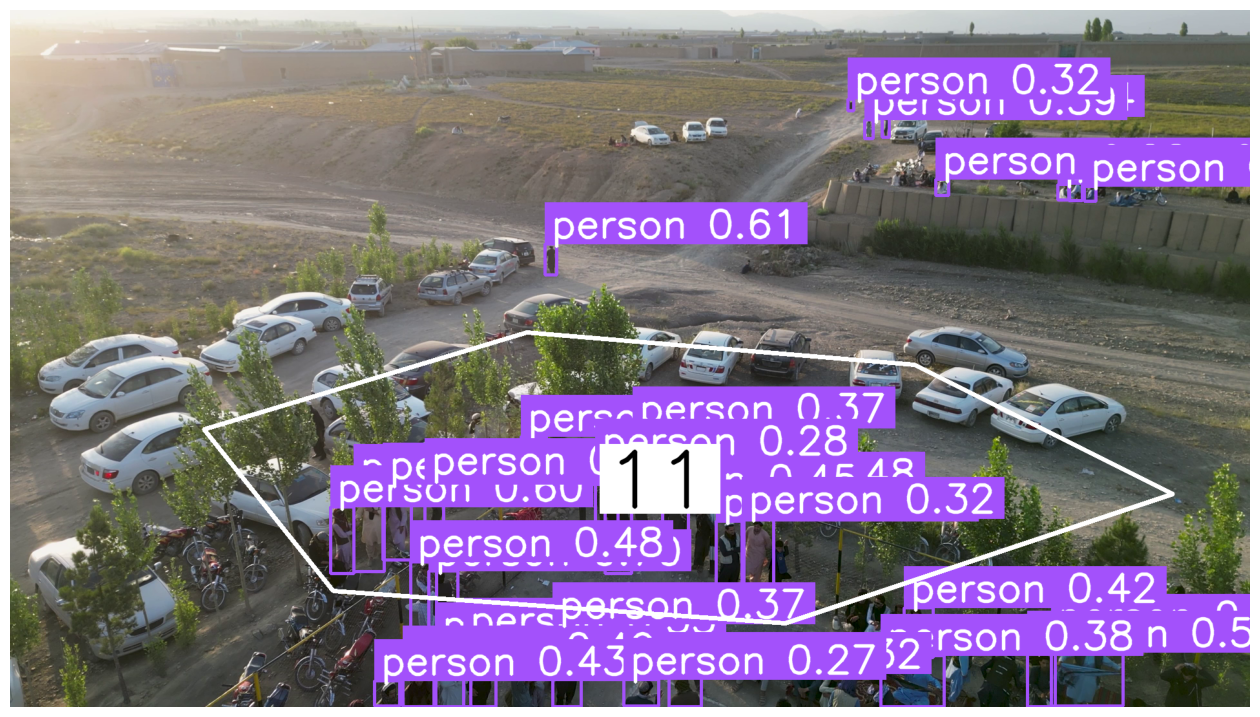

In [ ]:
import numpy as np
import supervision as sv

#initiate polygon zone
polygon = np.array([
    [300, 650],    # Point 1
    [800, 500],    # Point 2
    [1400, 550],   # Point 3
    [1800, 750],   # Point 4
    [1200, 950],   # Point 5
    [500, 900],    # Point 6
])
video_info = sv.VideoInfo.from_video_path('/content/6356427_Football Stadium_Prayer_1920x1080.mp4')
zone = sv.PolygonZone(polygon = polygon)

#initiate annotators
box_annotator = sv.BoundingBoxAnnotator(thickness=4)
label_annotator = sv.LabelAnnotator(text_thickness=4, text_scale = 2)
zone_annotator = sv.PolygonZoneAnnotator(zone = zone, color = sv.Color.WHITE, thickness = 6, text_thickness = 6, text_scale =4)



generator = sv.get_video_frames_generator('/content/6356427_Football Stadium_Prayer_1920x1080.mp4')
iterator = iter(generator)
frame = next(iterator)

#detect
results = model(frame, imgsz = 1280)[0]
detections = sv.Detections.from_ultralytics(results)
detections = detections[detections.class_id == 0]
zone.trigger(detections=detections)

#anotate
labels = [f"{model.names[class_id]} {confidence:0.2f}" for _, _, confidence, class_id, _, _ in detections]
frame = box_annotator.annotate(scene = frame, detections = detections)
frame = label_annotator.annotate(scene = frame, detections = detections, labels = labels)
frame = zone_annotator.annotate(scene = frame)

%matplotlib inline
sv.plot_image(frame,(16,16))

In [ ]:
import numpy as np
import supervision as sv

#initiate polygon zone
polygon = np.array([
    [300, 650],    # Point 1
    [800, 500],    # Point 2
    [1400, 550],   # Point 3
    [1800, 750],   # Point 4
    [1200, 950],   # Point 5
    [500, 900],    # Point 6
])
video_info = sv.VideoInfo.from_video_path('/content/6356427_Football Stadium_Prayer_1920x1080.mp4')
zone = sv.PolygonZone(polygon = polygon)

#initiate annotators
box_annotator = sv.BoundingBoxAnnotator(thickness=4)
label_annotator = sv.LabelAnnotator(text_thickness=4, text_scale = 2)
zone_annotator = sv.PolygonZoneAnnotator(zone = zone, color = sv.Color.WHITE, thickness = 6, text_thickness = 6, text_scale =4)


def process_frame(frame: np.ndarray, _) -> np.ndarray:
    #detect
    results = model(frame, imgsz = 1280)[0]
    detections = sv.Detections.from_ultralytics(results)
    detections = detections[detections.class_id == 0]
    zone.trigger(detections=detections)

    #anotate
    labels = [f"{model.names[class_id]} {confidence:0.2f}" for _, _, confidence, class_id, _, _ in detections]
    frame = box_annotator.annotate(scene = frame, detections = detections)
    frame = label_annotator.annotate(scene = frame, detections = detections, labels = labels)
    frame = zone_annotator.annotate(scene = frame)

    return frame

sv.process_video(source_path = '/content/6356427_Football Stadium_Prayer_1920x1080.mp4' ,target_path = f"{HOME}/zone-result.mp4" ,callback = process_frame)

from IPython import display
display.clear_output()